# Part II - FordGoBike User Behaviour in San Francisco Bay Area
## by Zainab Akanji


## Investigation Overview

In this investigation, I aimed to look at the behaviour of the two FordGoBike user types and different gender types in San Francisco Bay Area.
  Summary of key insights:
  I wrangled the data preliminarily and removed outliers; I explored the individual variables of interest and I found out that;

Most trips were between 0 1nd 15 minutes with a peak at 10 minutes

Most users are subscribers

75% of bike users are males, about 20% are females and about 5% are of the other gender.

Most bike users are between the ages of 25-40years with a peak age at 30years.

The highest number of trips are taken on Thursdays

The highest number of trips are taken by 8a.m and 5p.m which corresponds to the beginning and end of work hours respectively.

 Then I moved on to perform Bivariate Explortation and analysis showed that;

Users between the ages 25-35years take the most trips that are less than 20 minutes

More trips are taken during the weekends

Customers take longer bike trips

Subscribers take most of their trips during the weekday and Customers take most of their trips during weekends

 Then on Multivariate Exploration;

There is no significant relationship between age, bike duration and gender.

Female customers take the longest of trips

Male and Female Subscribers are most active by the beginning and end of work hours(i.e 8a.m and 5p.m) while male and female customers take their most trips between 7a.m and 10p.m since customers tend to ride mostly on weekends.

## Dataset Overview

There are 174952 bike observations in the dataset with 16 features. Some variables are numeric in nature, but user_type and member_gender are qualitative in nature. There were 183412 observations originally but missing values were dropped.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#data wrangling
bike_copy = bike_data.copy()
bike_copy.dropna(axis=0,inplace=True)

In [4]:
#data wrangling
bike_copy['start_time'] = pd.to_datetime(bike_copy['start_time'])
bike_copy['end_time'] = pd.to_datetime(bike_copy['end_time'])

bike_copy.start_station_id = bike_copy.start_station_id.astype('str')
bike_copy.end_station_id = bike_copy.end_station_id.astype('str')
bike_copy.bike_id = bike_copy.bike_id.astype('str')

bike_copy.member_birth_year = bike_copy.member_birth_year.astype(str).str[:-2]

#drop the birth year of 1878..could be an outlier
bike_copy.drop(bike_copy[(bike_copy.member_birth_year == 1878  )].index, inplace = True)


In [5]:
#data wrangling
bike_copy.member_birth_year = bike_copy.member_birth_year.astype('int')
bike_copy['age'] = 2019 - bike_copy['member_birth_year']

bike_copy['trip_month'] = bike_copy['start_time'].dt.month_name()
bike_copy['trip_day'] = bike_copy['start_time'].dt.day_name()

bike_copy['trip_hour'] = bike_copy['start_time'].dt.hour


In [6]:
#subsetting data
bike_copy['duration_min'] = bike_copy.duration_sec / 60

bike_clean = bike_copy.query('age <= 80')

bike_cleaned = bike_clean.query('duration_min <= 80')

#Rearrange the trip hours
hour_trips = range(0,23)
hour_category = pd.api.types.CategoricalDtype(ordered=True, categories=hour_trips)
bike_copy['trip_hour'] = bike_copy.trip_hour.astype(hour_category)

## Distribution of Trip Duration

Most bike trips were between 0 to 15 minutes with peak at 10 minutes. This could be due to short distances taken between the respective start and end stations



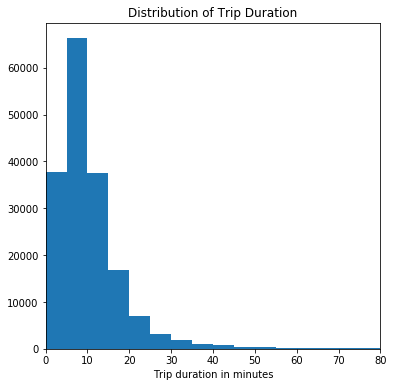

In [7]:
plt.figure(figsize=[6,6])
bins = np.arange(0, bike_cleaned['duration_min'].max()+ 5, 5)
plt.hist(data=bike_cleaned, x='duration_min', bins=bins)
plt.xlabel('Trip duration in minutes')
plt.title('Distribution of Trip Duration')
#setting limits between 0 and 80 because all points fell within this range.
plt.xlim(0,80);

In [8]:
#define a function for creating countplot
def aCountPlot(bike_copy,x,color=sb.color_palette()[0],order=None):
    '''This function plots the counts of the x-variable'''
    #set plot dimensions
    plt.figure(figsize=[14,6])
    #plot
    sb.countplot(data=bike_copy, x=x, edgecolor='black', color=color, order=order);
    #after plotting, clean up variable name
    x=x.replace("_"," ")#replace _ with a space
    #add title and format it
    plt.title(f'''Distribution of {x}'''.title(), fontsize=14, weight='bold')
    #add xlabel and format it
    plt.xlabel(x.title(), fontsize=10, weight='bold')
    #add ylabel and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

## Counts of the two user types

The question I want to answer in this practice is that "Are there more subscribers than customers?" To answer this question, I visualized a countplot that shows most users are subscribers.

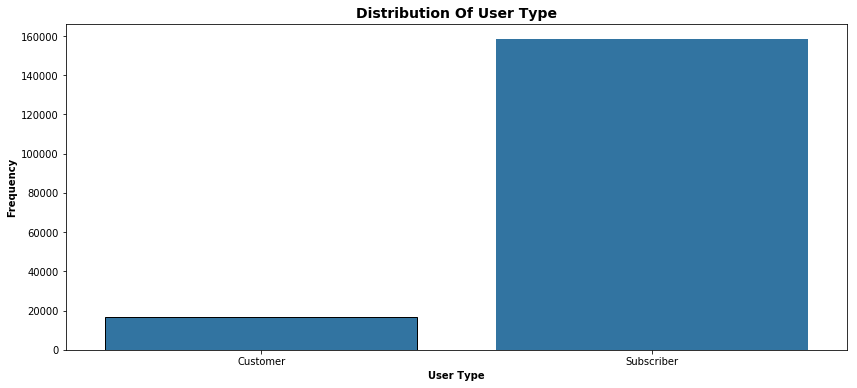

In [9]:
#call plot function
aCountPlot(bike_copy, 'user_type')

## Member gender frequency

The question I want to answer in this practice is that "Are there more male or female or others taking bike trips?" To answer this question, I built a countplot that shows the frequency of member gender.
From the plot shown below, 75% of bike users are males, about 20% are females and about 5% are of the other gender

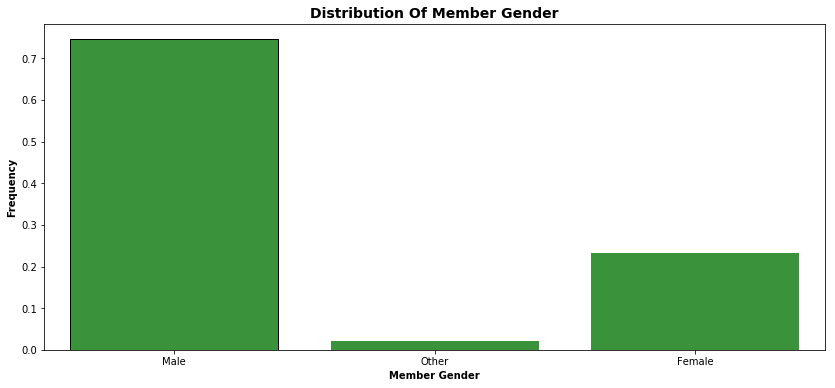

In [10]:
gender_counts = bike_copy['member_gender'].value_counts()
n_counts = bike_copy['member_gender'].value_counts().sum()
max_counts = gender_counts[0]
order = gender_counts.index

#getting the proportions
max_prop = max_counts/n_counts
base_color = sb.color_palette()[2]
ticks=np.arange(0, max_prop, 0.1)
tick_name = [ '{:0.1f}'.format(v) for v in ticks]
#call plot function
aCountPlot(bike_copy, 'member_gender', color=base_color)
plt.yticks(ticks*n_counts, tick_name);

## Trip Distribution of user types

Customers take more trips than Subscribers with Female customers taking the longest of trips.

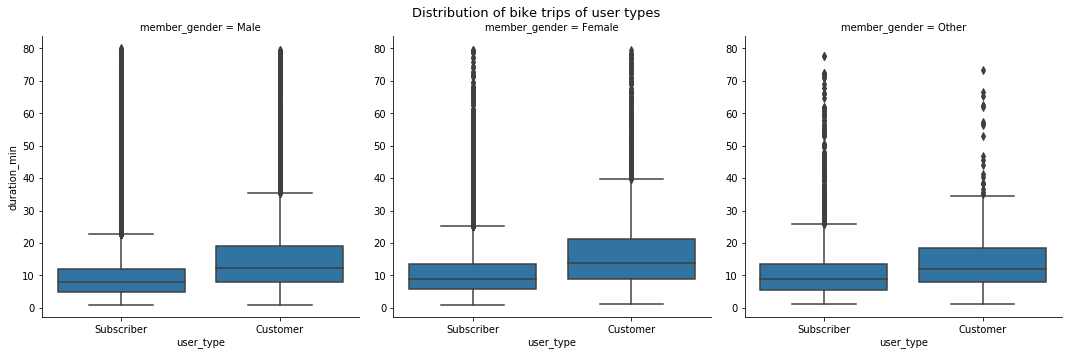

In [11]:
g = sb.FacetGrid(data=bike_cleaned, col='member_gender', size = 5)
g.map(sb.boxplot, 'user_type', 'duration_min')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of bike trips of user types', fontsize=13);

## Distribution of bike trips of user types of different gender at different hours of the day

Male and Female Subscribers are most active by the beginning and end of work hours(i.e 8a.m and 5p.m) while male and female customers take their most trips between 7a.m and 10p.m since customers tend to ride mostly on weekends.

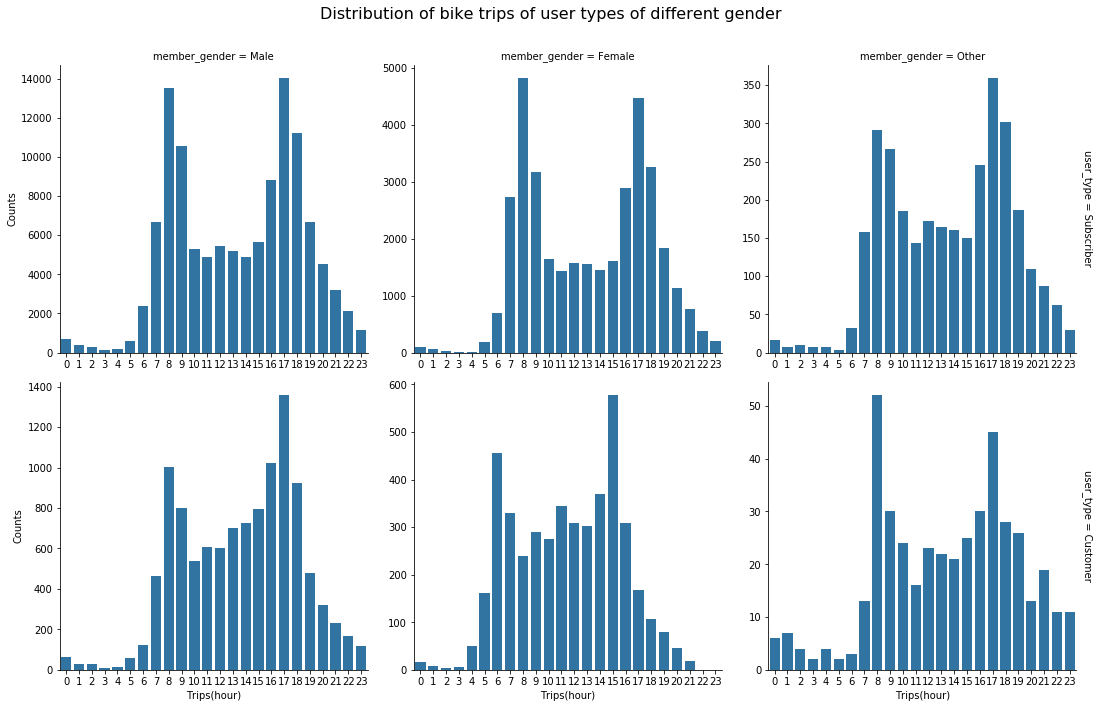

In [12]:
g = sb.FacetGrid(data = bike_cleaned, col = 'member_gender', row = 'user_type', size = 5,
                margin_titles = True, sharey=False)
g.map(sb.countplot, 'trip_hour')
g.set_xlabels('Trips(hour)')
g.set_ylabels('Counts')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of bike trips of user types of different gender', fontsize=16);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert FordGoBike_System_Data_Explanatory_Visualization --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook FordGoBike_System_Data_Explanatory_Visualization.ipynb to slides
[NbConvertApp] Writing 396299 bytes to FordGoBike_System_Data_Explanatory_Visualization.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/FordGoBike_System_Data_Explanatory_Visualization.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-o

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
